In [1]:
pip install dipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.7 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 4.0.2
    Uninstalling nibabel-4.0.2:
      Successfully uninstalled nibabel-4.0.2


In [2]:
import numpy as np
import torch
import os
import nibabel as nb
from dipy.denoise.patch2self import patch2self
import numpy as np
import matplotlib.pyplot as plt
from dipy.io.image import load_nifti, save_nifti
from time import time

In [3]:
def get_data(file, mmap=True):
    """
    Load NIfTI image data from a file.

    Parameters:
        file (str): The path to the NIfTI file.
        mmap (bool, optional): Whether to use memory-mapped file access. Default is True.

    Returns:
        numpy.ndarray: The voxel data from the NIfTI file.
    """
    img = nb.load(file, mmap=mmap)
    img_voxels = img.get_fdata()
    return img_voxels

In [4]:
def denoise_patch2Self(data, bvals):   
    denoised_batch1 = patch2self(data[..., :55], bvals[:55], b0_threshold=50, b0_denoising=False, clip_negative_vals=True, shift_intensity=False)
    denoised_batch2 = patch2self(data[..., 55:], bvals[55:], b0_threshold=50, b0_denoising=False, clip_negative_vals=True, shift_intensity=False)
    denoised_p2s = np.concatenate((denoised_batch1, denoised_batch2), axis=3)
    return denoised_p2s

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
bvals = np.genfromtxt('/Simulation_data_exp6/gaussian-noise/data_b0b1b2k.txt', dtype=np.float32)

In [7]:
bvals

array([   5.,    5.,    5.,    5.,    5., 1000., 1000.,  995.,  995.,
        995., 1005., 1000.,  995., 1005.,  995.,  995., 1000., 1005.,
       1000.,  995., 1000., 1000., 1000.,  995., 1000.,  990.,  990.,
       1000.,  995., 1000.,  995.,  995.,  995., 1000., 1005.,  995.,
       1000., 1000.,  995., 1000., 1000., 1005., 1005., 1005., 1000.,
       1005., 1000.,  995., 1000., 1005., 1000.,  995., 1005., 1000.,
       1000., 2005., 1990., 2000., 2000., 1995., 2010., 2000., 2000.,
       1995., 2000., 1990., 2000., 1995., 1990., 1995., 1995., 2000.,
       2000., 1990., 1990., 2000., 1995., 1995., 1995., 1995., 1995.,
       1995., 2005., 1995., 1990., 2000., 2005., 1990., 1990., 1995.,
       2000., 2005., 1995., 2005., 2000., 2000., 2000., 2005., 2000.,
       2005., 2005., 2005., 1990., 1995., 1995.], dtype=float32)

In [ ]:
indices_b1 = np.where((bvals > 100) & (bvals < 1500))[0]
indices_b1

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])

In [ ]:
indices_b01 = np.where(bvals < 1500)[0]
print(indices_b01[:10])
print(indices_b01.shape)

[0 1 2 3 4 5 6 7 8 9]
(55,)


In [ ]:
indices_b2 = np.where(bvals > 1500)[0]
print(indices_b2[:10])
print(indices_b2.shape)
print(bvals[55])

[55 56 57 58 59 60 61 62 63 64]
(50,)
2005.0


In [ ]:
bvals[:55]

array([   5.,    5.,    5.,    5.,    5., 1000., 1000.,  995.,  995.,
        995., 1005., 1000.,  995., 1005.,  995.,  995., 1000., 1005.,
       1000.,  995., 1000., 1000., 1000.,  995., 1000.,  990.,  990.,
       1000.,  995., 1000.,  995.,  995.,  995., 1000., 1005.,  995.,
       1000., 1000.,  995., 1000., 1000., 1005., 1005., 1005., 1000.,
       1005., 1000.,  995., 1000., 1005., 1000.,  995., 1005., 1000.,
       1000.], dtype=float32)

In [ ]:
bvals[55:]

array([2005., 1990., 2000., 2000., 1995., 2010., 2000., 2000., 1995.,
       2000., 1990., 2000., 1995., 1990., 1995., 1995., 2000., 2000.,
       1990., 1990., 2000., 1995., 1995., 1995., 1995., 1995., 1995.,
       2005., 1995., 1990., 2000., 2005., 1990., 1990., 1995., 2000.,
       2005., 1995., 2005., 2000., 2000., 2000., 2005., 2000., 2005.,
       2005., 2005., 1990., 1995., 1995.], dtype=float32)

In [ ]:
dataset_url = f'/Simulation_data_exp6/rician-noise/main-Rician-noisy_data_snr10.nii.gz'
noisydata_snr = get_data(dataset_url)

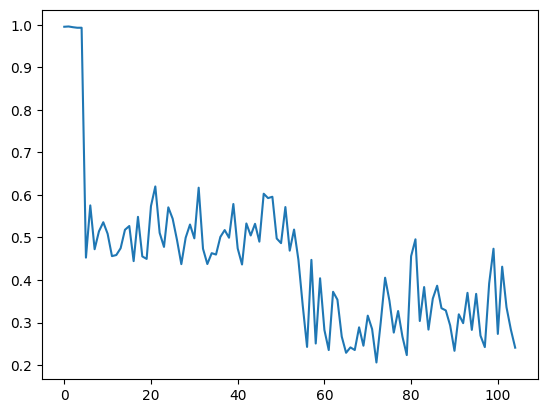

In [ ]:
import matplotlib.pyplot as plt
plt.plot(noisydata_snr[24,42,36,:])

In [8]:
SNRs = [10] #3,5,10,20,40

In [9]:
for snr in SNRs:
  dataset_url = f'/Simulation_data_exp6/gaussian-noise/main-Gaussian-noisy_data_snr{snr}.nii.gz'
  noisydata_snr = get_data(dataset_url)
  data, affine = load_nifti(dataset_url)

  ######  Patch2Self  ######
  print(f'init Patch2Self snr:{snr}')
  t = time()
  denoised_patch2self = denoise_patch2Self(noisydata_snr, bvals)
  print("total time", time() - t)
  print('end Patch2Self')
  #save_nifti(f'/Simulation_data_exp6/rician-noise/patch2self/denoised_main_snr{snr}-patch2self-multi-shells-7.nii.gz', denoised_patch2self, affine)

init Patch2Self snr:10
total time 475.98563861846924
end Patch2Self




---

MPPCA

In [10]:
# load main pca function using Marcenko-Pastur distribution
from dipy.denoise.localpca import mppca

In [11]:
maskdata = get_data('/Simulation_data_exp6/gaussian-noise/nodif_brain_mask.nii.gz')

In [12]:
for snr in SNRs:
  dataset_url = f'/Simulation_data_exp6/rician-noise/main-Rician-noisy_data_snr{snr}.nii.gz'
  noisydata_snr = get_data(dataset_url)
  data, affine = load_nifti(dataset_url)

  print(f'init mppca snr:{snr}')
  t = time()
  denoised_arr_ppca = mppca(data, mask=maskdata)
  print("total time", time() - t)
  print('end mppca')
  #save_nifti(f'/Simulation_data_exp6/rician-noise/mppca/denoised_main_snr{snr}-denoised_mppca.nii.gz', denoised_arr_ppca, affine)

init mppca snr:10


/usr/local/lib/python3.10/dist-packages/dipy/denoise/localpca.py:379: RuntimeWarning: invalid value encountered in divide
  denoised_arr = thetax / theta


total time 1823.6073579788208
end mppca




---
Non-Local Means (NLMEANS)


In [13]:
from dipy.denoise.nlmeans import nlmeans
from dipy.denoise.noise_estimate import estimate_sigma

In [15]:
for snr in SNRs:
  dataset_url = f'/Simulation_data_exp6/rician-noise/main-Rician-noisy_data_snr{snr}.nii.gz'
  noisydata_snr = get_data(dataset_url)
  data, affine = load_nifti(dataset_url)

  sigma = estimate_sigma(data, N=0)
  print(f'init nlmeans:{snr}')
  t = time()
  den = nlmeans(data, sigma=sigma, mask=maskdata, patch_radius=1, block_radius=2, rician=True) #remove rician=True when is gaussian noise
  print("total time", time() - t)
  print('end nlmeans')
  #save_nifti(f'/Simulation_data_exp6/rician-noise/nlmeans/denoised_main_snr{snr}-denoised_nlmeans2.nii.gz', den, affine)

init nlmeans:10
total time 57.33317732810974
end nlmeans
